In [1]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL, Task, URIRef

In [2]:
jasper = RSPEngine("http://jasper:8181/jasper")

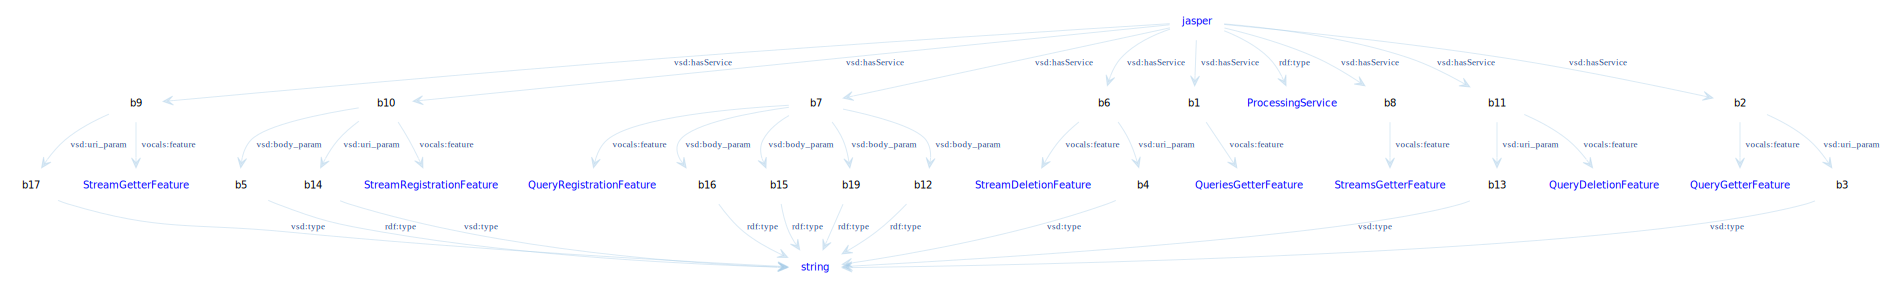

In [3]:
from rsplib.drawgraph import draw_graph
from IPython.display import display_html, Javascript, SVG, Image, display_svg,display_png
data, metadata = draw_graph(jasper.service().g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [4]:
jasper.streams()

[http://streamhub:9292/streamhub/streams/colorstream]

In [5]:
jasper.tasks()

[]

In [6]:
qid  = "blackcount"
tbox = "http://mynotebook:8888/files/colors.owl"
frmt = "JSON"
body ="""
        SELECT (COUNT(?b) as ?numBlack)
        FROM NAMED WINDOW <bw> ON <http://streamhub:9292/streamhub/streams/colorstream> [RANGE PT15S STEP PT5S]
        WHERE {
                WINDOW ?bw { ?b a <http://www.streamreasoning.org/ontologies/2018/9/colors#Black> .}
            }
      """

In [7]:
blackcount_query = jasper.create(qid, body, tbox, frmt)

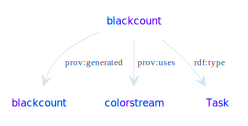

In [8]:
data, metadata = draw_graph(blackcount_query.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [9]:
blackcount_query.sources()

[GET http://streamhub:9292/streamhub/streams/colorstream]

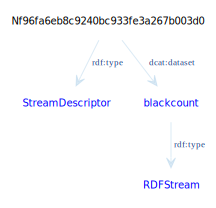

In [10]:
blackcount_stream = blackcount_query.stream()
data, metadata = draw_graph(blackcount_stream.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)


# The stream has no endpoint. 

In [11]:
blackcount_stream.endpoints()

[]

In [12]:
# We need to expose it!

In [13]:
r = jasper.expose(qid, 'HTTP', retention=5)

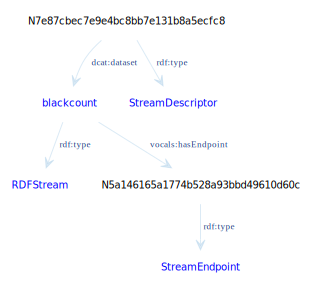

In [14]:
data, metadata = draw_graph(r.g, 'svg')
display_svg(data['image/svg+xml'], raw=True)

In [15]:
jasper.streams()

[http://streamhub:9292/streamhub/streams/colorstream,
 http://jasper:8181/jasper/streams/blackcount]

In [16]:
endpoints = r.endpoints()

In [17]:
endpoints

[GET http://jasper:8183/jasper/streams/blackcount/observers/169784498]

In [18]:
endpoint = endpoints[0]

In [19]:
resp = endpoint.call()
resp

[
    {
        "head": {
            "vars": [
                "numBlack"
            ]
        },
        "results": {
            "bindings": [
                {
                    "numBlack": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "28"
                    }
                }
            ]
        }
    },
    {
        "head": {
            "vars": [
                "numBlack"
            ]
        },
        "results": {
            "bindings": [
                {
                    "numBlack": {
                        "type": "literal",
                        "datatype": "http://www.w3.org/2001/XMLSchema#integer",
                        "value": "51"
                    }
                }
            ]
        }
    },
    {
        "head": {
            "vars": [
                "numBlack"
            ]
        },
        "results": {
            "bindings

In [20]:
df = resp.flatten().dataframe(['results_bindings_0_numBlack_value'])

In [21]:
df

,head_vars_0,results_bindings_0_numBlack_datatype,results_bindings_0_numBlack_type,results_bindings_0_numBlack_value
0,numBlack,http://www.w3.org/2001/XMLSchema#integer,literal,28
1,numBlack,http://www.w3.org/2001/XMLSchema#integer,literal,51
2,numBlack,http://www.w3.org/2001/XMLSchema#integer,literal,72


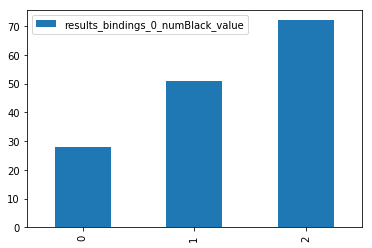

In [22]:
%matplotlib inline
df.plot(kind='bar');

In [23]:
jasper.delete(qid)

{
    "@id": "queries/blackcount",
    "@type": "vprov:Task",
    "prov:generated": {
        "@id": "streams/blackcount"
    },
    "prov:uses": {
        "@id": "http://streamhub:9292/streamhub/streams/colorstream"
    },
    "@context": {
        "@base": "http://jasper:8181/jasper/",
        "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#",
        "vsd": "http://w3id.org/rsp/vocals-sd#",
        "vocals": "http://w3id.org/rsp/vocals#",
        "xsd": "http://www.w3.org/2001/XMLSchema#",
        "format": "http://www.w3.org/ns/formats/",
        "rdfs": "http://www.w3.org/2000/01/rdf-schema#",
        "vprov": "http://w3id.org/rsp/vocals-prov#",
        "dcat": "http://www.w3.org/ns/dcat#",
        "prov": "http://www.w3.org/ns/prov#"
    }
}